# Análisis de datos sobre COVID-19 en México

##Nomenclatura
####TablaD = Tabla que contiene información de todos los casos (positivos, sospechosos, negativos).
####DEF = Tabla que contiene casos (positivos, sospechosos, negativos) de pacientes fallecidos.
####DEFP = Tabla que contiene casos positivos de pacientes fallecidos.

##Análisis de Infectados por COVID19

In [ ]:
import numpy as np
import pandas as pd
import requests
import os 
import math
import matplotlib.pyplot as plt

Tabla=pd.read_csv('200914COVID19MEXICO.csv',encoding='latin')
TablaD=pd.DataFrame(Tabla)

In [ ]:
COVID19_FCOLUMNAS=TablaD.drop(['FECHA_ACTUALIZACION','ID_REGISTRO', 'ORIGEN', 'SECTOR', 'ENTIDAD_UM','ENTIDAD_RES', 'MUNICIPIO_RES',
                     'FECHA_SINTOMAS','INTUBADO', 'NACIONALIDAD','HABLA_LENGUA_INDIG','OTRA_COM', 'OTRO_CASO','MIGRANTE',
                    'PAIS_NACIONALIDAD', 'PAIS_ORIGEN', 'UCI'], axis=1)

In [ ]:
# A continuación se muestra una lista donde aparecen los estados numerados para interpretar la tabla anterios, tambien es 
#necesario mencionar que en sexo, 1=hombre y 2=mujer.
url_estados = 'http://api.imco.org.mx/wiki/index.php/Listado_de_estados_de_la_Rep%C3%BAblica_Mexicana'   #url  
html_estados = requests.get(url_estados).content               #descarga el archivo
Estados_Num = pd.read_html(html_estados, header = 0)
Estados_Num2 = Estados_Num[-1] 
Estados_N=pd.DataFrame(Estados_Num2)
Estados_N.rename(columns={'ID de estado (Dar click para ordenar)': 'ID', 
                          'Nombre del estado (Dar click para ordenar)': 'Estado'}, inplace=True)
Estados_N_R=Estados_N.drop(['Municipios del estado (Dar click para ordenar)'], axis=1)



In [ ]:
#Filtrado de las Fila. El DataFrame ahora solo los casos disgnosticados como positivos de COVID19 en cada estado
COVID19_FFILAS1 = COVID19_FCOLUMNAS.drop(COVID19_FCOLUMNAS[COVID19_FCOLUMNAS['RESULTADO']==2].index)
COVID19_FFILAS2 = COVID19_FFILAS1.drop(COVID19_FFILAS1[COVID19_FFILAS1['RESULTADO']==3].index)
COVID19_FFILAS2 = COVID19_FFILAS2.drop(COVID19_FFILAS2[COVID19_FFILAS2['ENTIDAD_NAC']==99].index)

In [ ]:
freq = COVID19_FFILAS2.groupby(['ENTIDAD_NAC']).count()     #cuenta el numero de veces que se repite el valor con el que
                                                            #está designado el estado, esto regresa un data frame con el num
                                                            #de columna igual al DataFrame ya filtrado lleno de las veces que 
                                                            #se repite cada valor de la entidad
freq_states=pd.DataFrame({'RESULTADO':freq['RESULTADO']})
freq_states=pd.DataFrame(freq_states.values)
freq_states.rename(columns={0: 'Total'}, inplace=True)
Estados_N_R['Contagios']=freq_states.Total
Total = Estados_N_R['Contagios'].sum()

def porcentaje(n):                                           #función para encontrar cuanto porcentaje del global de contagios
   return (n/Total)*100                                      #hay en cada estado

Estados_N_R['Porcentaje']=Estados_N_R['Contagios'].apply(porcentaje)




Text(0.5, 1.0, 'Infectados de COVID19')

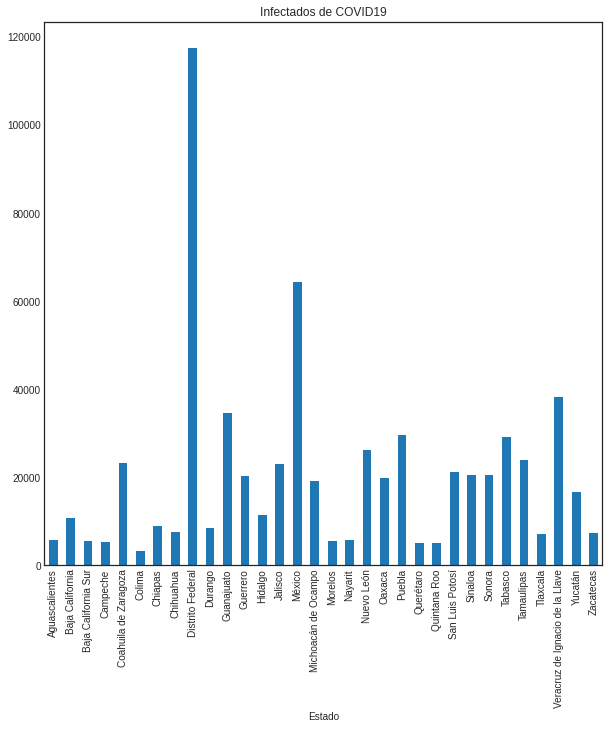

In [ ]:
ts = pd.Series(Estados_N_R.Contagios, index=Estados_N_R.Estado)

for i in range (len(ts.values)):
   ts[i]=Estados_N_R.Contagios.values[i]

fig=plt.figure(figsize=(10,10))
ts.plot.bar()
plt.title('Infectados de COVID19')



Total Recien Nacidos con COVID19 en México: 1314


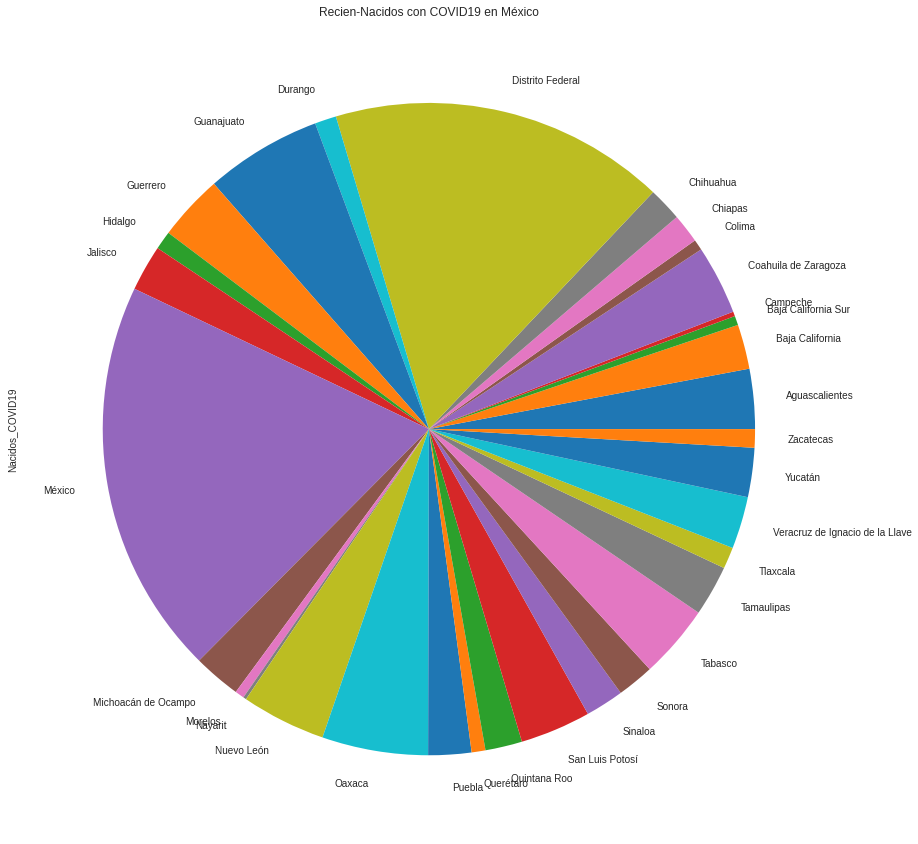

In [ ]:
COVID19_RNacidos = COVID19_FFILAS2.drop(COVID19_FFILAS2[COVID19_FFILAS2['EDAD']!=0].index)
freq_edad = COVID19_RNacidos.groupby(['ENTIDAD_NAC']).count()
freq_states=pd.DataFrame({'EDAD':freq_edad['EDAD']})
freq_edad_states=pd.DataFrame(freq_states.values)
freq_edad_states.rename(columns={0: 'Total'}, inplace=True)
Estados_N_R['Nacidos_COVID19']=freq_edad_states.Total
Total_edad = Estados_N_R['Nacidos_COVID19'].sum()

ts_nacidos = pd.Series(Estados_N_R.Nacidos_COVID19, index=Estados_N_R.Estado)

for i in range (len(ts.values)):
   ts_nacidos[i]=Estados_N_R.Nacidos_COVID19.values[i]

fig=plt.figure(figsize=(15,15))
ts_nacidos.plot.pie()
plt.title('Recien-Nacidos con COVID19 en México')
print('Total Recien Nacidos con COVID19 en México:',Total_edad)

In [ ]:
Estados_N_R

,ID,Estado,Contagios,Porcentaje,Contagios_Asma,Contagios_Diabetes,Contagios_Hipertension,Nacidos_COVID19
0,1,Aguascalientes,5767,0.886856,190,888,1243,39
1,2,Baja California,10755,1.653916,449,1843,2688,29
2,3,Baja California Sur,5577,0.857637,210,717,1098,6
3,4,Campeche,5380,0.827342,193,918,1169,3
4,5,Coahuila de Zaragoza,23232,3.572642,433,2770,3489,45
5,6,Colima,3192,0.490869,115,501,651,7
6,7,Chiapas,9018,1.386798,307,1672,1974,19
7,8,Chihuahua,7492,1.152128,255,1227,1791,22
8,9,Distrito Federal,117570,18.080043,2698,15250,18695,219
9,10,Durango,8380,1.288686,216,1121,1532,14


##Análisis de Fallecidos por COVID19.

In [ ]:
TablaD.columns

#enlistamos las columnas

Index(['FECHA_ACTUALIZACION', 'ID_REGISTRO', 'ORIGEN', 'SECTOR', 'ENTIDAD_UM',
       'SEXO', 'ENTIDAD_NAC', 'ENTIDAD_RES', 'MUNICIPIO_RES', 'TIPO_PACIENTE',
       'FECHA_INGRESO', 'FECHA_SINTOMAS', 'FECHA_DEF', 'INTUBADO', 'NEUMONIA',
       'EDAD', 'NACIONALIDAD', 'EMBARAZO', 'HABLA_LENGUA_INDIG', 'DIABETES',
       'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 'OTRA_COM',
       'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO',
       'OTRO_CASO', 'RESULTADO', 'MIGRANTE', 'PAIS_NACIONALIDAD',
       'PAIS_ORIGEN', 'UCI'],
      dtype='object')

In [ ]:
# Los pacientes con fecha 9999-99-99 son pacientes no fallecidos. FIltremos los pacientes fallecidos. 
DEF=TablaD.loc[TablaD.FECHA_DEF!='9999-99-99',:]
DEF.isna().sum().sum()


13

In [ ]:
DEFP=DEF['RESULTADO']==1
DEFP = DEF[DEFP]

#Filtramos los casos confirmados

## 1. ¿Total de pacientes fallecidos por covid 19?

In [ ]:
DEFP['FECHA_DEF'].value_counts()
DEFP['FECHA_DEF'].value_counts().sum()

# Numero total de defunciones de casos confirmados de covid 

69649

 ## Edad promedio pacientes fallecidos

In [ ]:
# Calculemos la edad promedio de los pacientes fallecidos

DEFP['EDAD'].mean()

62.23454751683441

### La edad pormedio de pacientes fallecidos es de 62 años 

## 2.- ¿Que edad promedio de muerte por cada sexo? 

In [ ]:
# Filtremos los datos por sexo y calculemos su edad promedio separadamente, considerando solamente los datos en DF (correspondiente a los pacientes fallecidos). 
in_2 = DEFP['SEXO'] == 2
TablaD_3 = DEFP[in_2]

# Calculemos la edad promedio de la TablaD_3 que son los datos de los hombres fallecidos por covid 19. 

TablaD_3['EDAD'].mean()


61.66827223262867

### La edad promedio de hombres fallecidos por COV-19 es de 62 años. 

In [ ]:
# Filtremos los datos de las mujeres fallecidas 

in_1 = DEFP['SEXO'] == 1
TablaD_4 = DEFP[in_1]

# Calculemos la edad promedio
TablaD_4['EDAD'].mean()

63.258294698649465

### La edad promedio de la mujeres fallecidas por COV 19 es de 63

 ## 3. ¿Qué sexo es el que sufre mayor numero de defunciones?

In [ ]:
TablaD_3.shape

(44844, 35)

In [ ]:
TablaD_4.shape

(24805, 35)

### El numero de pacientes de pacientes masculinos fallecidos es de 45 696 y el de mujeres es de 25353. FALLECEN MÁS LOS HOMBRES.

## 4. Numero de recien nacidos fallecidos 

In [ ]:
DEFO=DEFP.sort_values('EDAD')['EDAD']
DEFO
#Observamos el maximo y el minimo de edad de pacientes fallecidos. 

888898      0
280893      0
772909      0
936189      0
874307      0
         ... 
31331     101
705145    101
679658    102
854978    102
273904    103
Name: EDAD, Length: 69649, dtype: int64

In [ ]:
# Filtramos los casos de pacientes fallecidos con edad cero (recien nacidos). 
in_0 = DEFP['EDAD'] == 0
RECIEN = DEFP[in_0]
RECIEN.shape

(65, 35)

### El numero es de 65 recien nacidos fallecidos. 

In [ ]:

Fdf=DEFP.drop(['FECHA_ACTUALIZACION','ID_REGISTRO', 'ORIGEN', 'SECTOR', 'ENTIDAD_UM', 'MUNICIPIO_RES',
                                       'FECHA_INGRESO','FECHA_SINTOMAS','INTUBADO', 'NACIONALIDAD','HABLA_LENGUA_INDIG','OTRA_COM',
                                       'OTRO_CASO','MIGRANTE','PAIS_NACIONALIDAD', 'PAIS_ORIGEN','TIPO_PACIENTE','ENTIDAD_NAC', 
                                       'UCI','FECHA_DEF','NEUMONIA','RESULTADO'], axis=1)


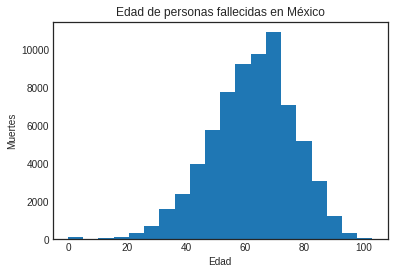

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
plt.hist(Fdf.EDAD, bins=20)
plt.title('Edad de personas fallecidas en México')
plt.ylabel('Muertes')
plt.xlabel('Edad')
plt.show()

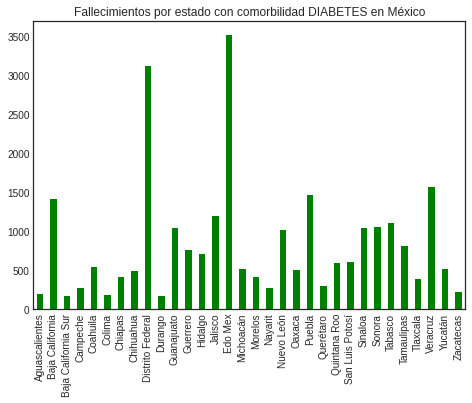

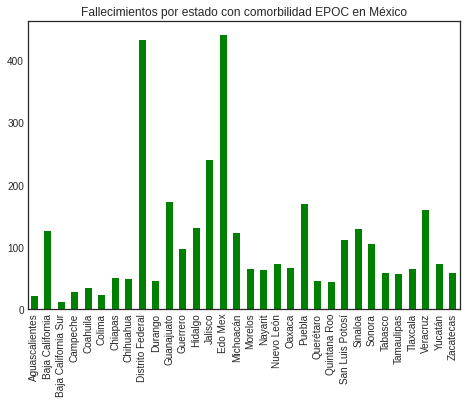

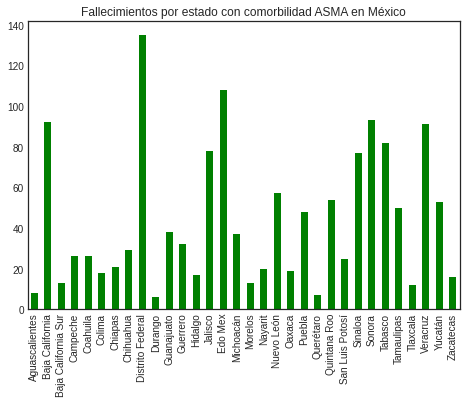

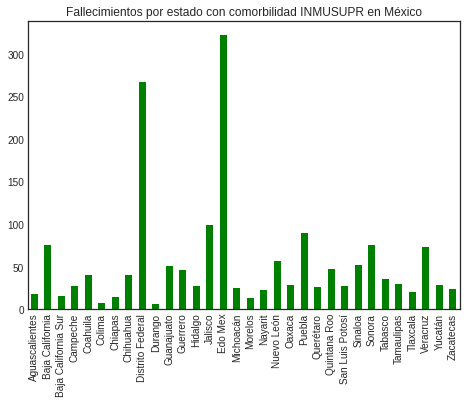

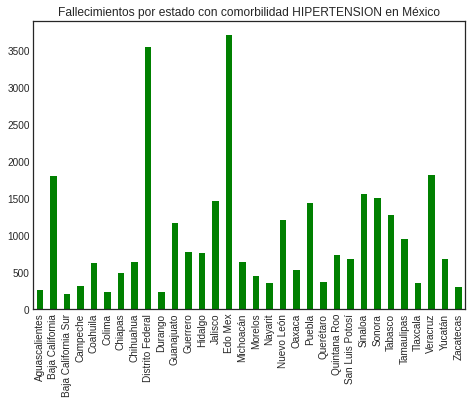

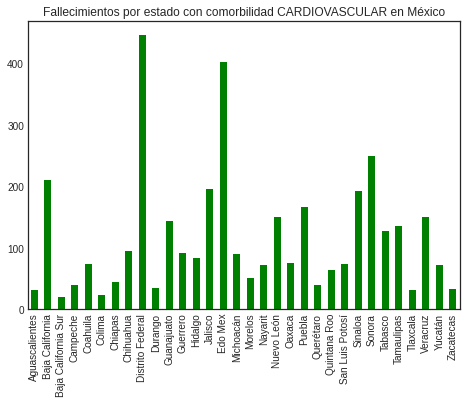

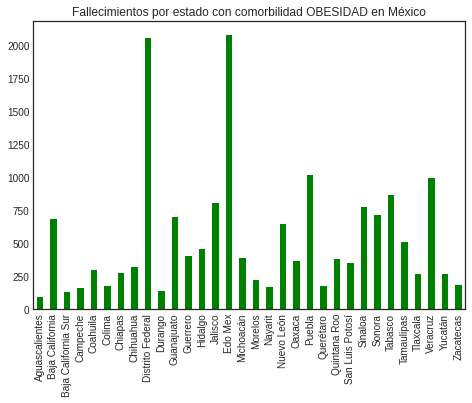

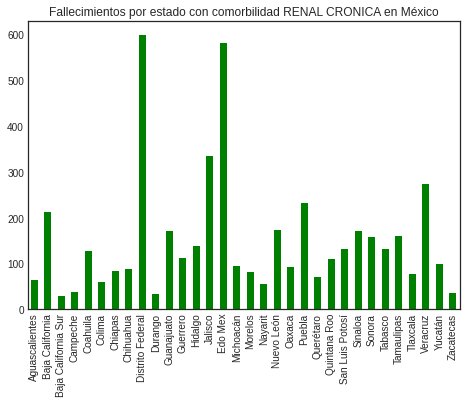

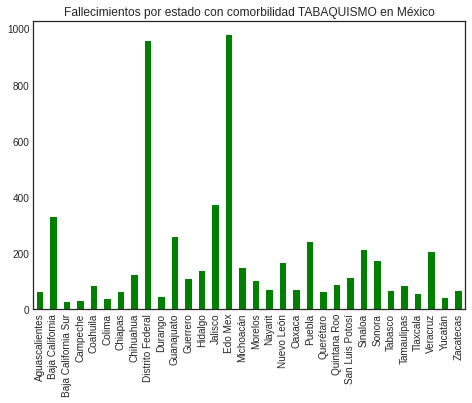

In [ ]:
estados = ['Aguascalientes', "Baja California", "Baja California Sur", "Campeche", "Coahuila","Colima","Chiapas","Chihuahua",
           "Distrito Federal", "Durango", "Guanajuato", "Guerrero", "Hidalgo", "Jalisco", "Edo Mex", "Michoacán","Morelos", "Nayarit",
           "Nuevo León", "Oaxaca", "Puebla","Querétaro","Quintana Roo","San Luis Potosí","Sinaloa","Sonora","Tabasco","Tamaulipas","Tlaxcala",
           "Veracruz","Yucatán","Zacatecas"]

comor = ['DIABETES','EPOC','ASMA','INMUSUPR','HIPERTENSION','CARDIOVASCULAR','OBESIDAD','RENAL CRONICA','TABAQUISMO']


s2=np.zeros((32,9), dtype=int)

for i in range(4,13):    
    rf=Fdf[Fdf.iloc[:, i] == 1]
    s=rf.groupby(['ENTIDAD_RES'])[Fdf.columns.values[i]].sum()
    s2[:,(i-4)]=s
    

for i in range(len(comor)):
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax=pd.Series(s2[:,i], index=estados)
    ax.plot.bar(color='g')
    plt.title('Fallecimientos por estado con comorbilidad '+str(comor[i])+' en México')
    plt.show()

##Gráfica de evolución de COVID 19

Text(0.5, 1.0, 'Acumulado de casos')

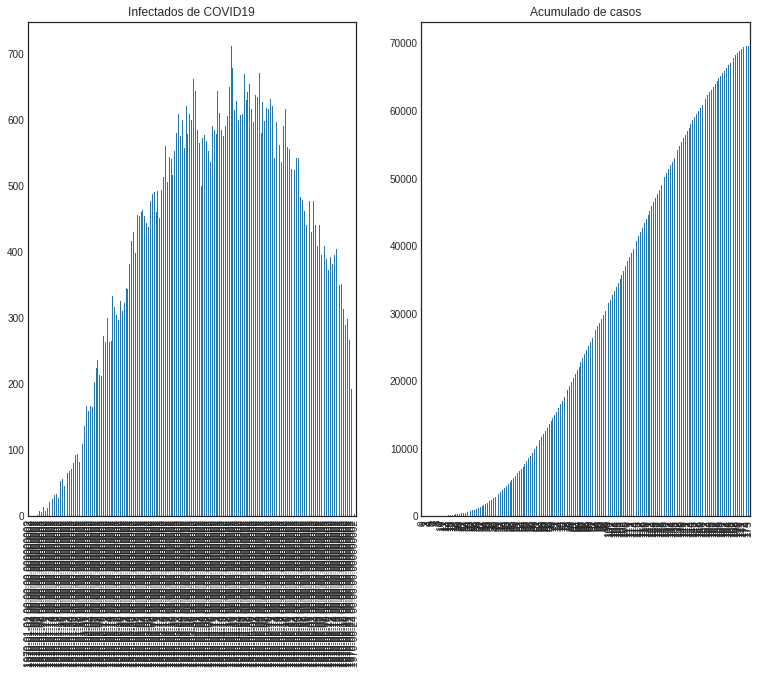

In [130]:
COVID19data_g=pd.DataFrame({'FECHA_DEF':TablaD['FECHA_DEF'],'RESULTADO':TablaD['RESULTADO']})
dg=COVID19data_g.loc[COVID19data_g.FECHA_DEF!='9999-99-99',:].loc[COVID19data_g.RESULTADO==1,:]
#dg['FECHA_DEF'] = pd.to_datetime(dg['FECHA_DEF'],format='%d/%m/%Y')
freq=dg.groupby(['FECHA_DEF']).count()
freq2=pd.DataFrame(freq.values)
freq2.rename(columns={0:'ff'},inplace=True)
freq2
ts=pd.Series(freq2.ff,index=pd.date_range(freq2.ff.values[0],periods=len(freq2.ff)))
#tsac=pd.Series(freq2.ff,index=pd.date_range(freq2.ff.values[0],periods=len(freq2.ff)))
n=len(freq2.ff)
tsac=[None]*(n)
tsac[0]=0
tsac=pd.Series(tsac)
for j in range(len(ts.values)):
    ts[j]=freq2.ff.values[j]
    tsac[j+1]=tsac[j]+ts[j]

#plt.figure(figsize=(10,6))
#plt.figure(figsize=(20,16))
#ts.plot.bar()
#tsac.plot()

fig=plt.figure(figsize=(20,20))
plt.subplot2grid((2,3),(0,0))
ts.plot.bar()
plt.title('Infectados de COVID19')

plt.subplot2grid((2,3),(0,1))
tsac.plot.bar()
plt.title('Acumulado de casos')